<a href="https://colab.research.google.com/github/ArshadP443/Rotating-Screw-CNN/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from re import I
import pandas as pd
from PIL import Image
import torch
import torchvision
from torchvision.transforms import Resize

In [ ]:
tensors = torch.load("/content/drive/MyDrive/Object Detection/TestTensors/df_test.pt")
print(tensors)
print(tensors["Tensor"].iloc[0].dtype)

     Video Number Frame Number  \
0              44          493   
1              44          494   
2              44          505   
3              44          507   
4              44          509   
...           ...          ...   
6260           49          217   
6261           49          235   
6262           49          228   
6263           49          220   
6264           49          245   

                                                 Tensor Label  
0     [[[tensor(0.5922), tensor(0.5922), tensor(0.59...     0  
1     [[[tensor(0.5922), tensor(0.5922), tensor(0.59...     0  
2     [[[tensor(0.5922), tensor(0.5882), tensor(0.58...     0  
3     [[[tensor(0.5882), tensor(0.5882), tensor(0.58...     0  
4     [[[tensor(0.5922), tensor(0.5922), tensor(0.58...     0  
...                                                 ...   ...  
6260  [[[tensor(0.5647), tensor(0.5647), tensor(0.56...     1  
6261  [[[tensor(0.5647), tensor(0.5686), tensor(0.56...     0  
6262  [[[tensor

In [ ]:
in_range = tensors[tensors["Label"].astype(str).str.contains("1")]
in_range = in_range.reset_index()
in_range = in_range.drop("index", axis = "columns")
print(in_range)
print(tensors["Tensor"].iloc[0].dtype)

    Video Number Frame Number  \
0             44          590   
1             44          588   
2             44          589   
3             44          803   
4             44          910   
..           ...          ...   
202           49          116   
203           49          139   
204           49          163   
205           49          189   
206           49          217   

                                                Tensor Label  
0    [[[tensor(0.5961), tensor(0.6000), tensor(0.60...     1  
1    [[[tensor(0.5961), tensor(0.5961), tensor(0.60...     1  
2    [[[tensor(0.6000), tensor(0.6000), tensor(0.60...     1  
3    [[[tensor(0.6157), tensor(0.6157), tensor(0.61...     1  
4    [[[tensor(0.6078), tensor(0.6078), tensor(0.61...     1  
..                                                 ...   ...  
202  [[[tensor(0.5647), tensor(0.5647), tensor(0.56...     1  
203  [[[tensor(0.5686), tensor(0.5686), tensor(0.56...     1  
204  [[[tensor(0.5686), tensor(0.564

In [ ]:
for x in range(0, len(in_range)):
  for y in range(1, 41):
    row = in_range.iloc[y].copy()
    tensors = tensors._append(row, ignore_index=True)

In [ ]:
print(tensors)

      Video Number Frame Number  \
0               44          493   
1               44          494   
2               44          505   
3               44          507   
4               44          509   
...            ...          ...   
13664           44         1335   
13665           44         1334   
13666           44         1408   
13667           44         1409   
13668           44           55   

                                                  Tensor Label  
0      [[[tensor(0.5922), tensor(0.5922), tensor(0.59...     0  
1      [[[tensor(0.5922), tensor(0.5922), tensor(0.59...     0  
2      [[[tensor(0.5922), tensor(0.5882), tensor(0.58...     0  
3      [[[tensor(0.5882), tensor(0.5882), tensor(0.58...     0  
4      [[[tensor(0.5922), tensor(0.5922), tensor(0.58...     0  
...                                                  ...   ...  
13664  [[[tensor(0.4863), tensor(0.4792), tensor(0.47...     1  
13665  [[[tensor(0.4745), tensor(0.4639), tensor(0.45...   

In [ ]:
torch.save(tensors, "/content/drive/MyDrive/Object Detection/TestTensors/AugementTest.pt")

In [ ]:
to_image = torchvision.transforms.ToPILImage()

tensor([[[0.6745, 0.6745, 0.6745,  ..., 0.5412, 0.5451, 0.5451],
         [0.6588, 0.6824, 0.6784,  ..., 0.5412, 0.5412, 0.5412],
         [0.6392, 0.6706, 0.6784,  ..., 0.5373, 0.5412, 0.5451],
         ...,
         [0.8353, 0.8353, 0.8353,  ..., 0.7647, 0.7647, 0.7647],
         [0.8353, 0.8353, 0.8353,  ..., 0.7647, 0.7647, 0.7647],
         [0.8353, 0.8353, 0.8353,  ..., 0.7647, 0.7608, 0.7647]]])


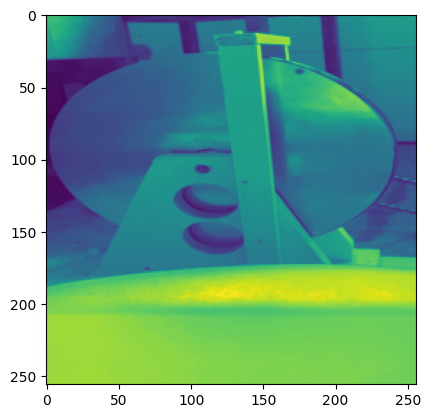

In [ ]:
import matplotlib.pyplot as plt
print(in_range["Tensor"].iloc[0])
image = to_image(in_range["Tensor"].iloc[0])
plt.imshow(image)

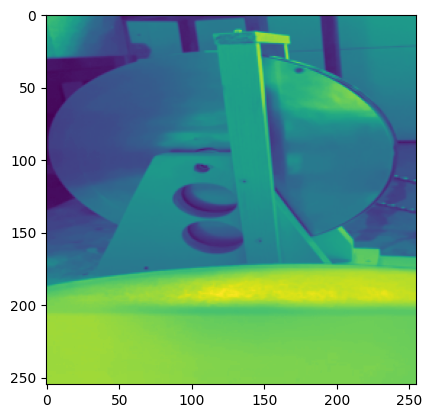

In [ ]:
image1 = torchvision.transforms.functional.crop(img = image, top = 1, left = 1, height = 255, width = 255)
plt.imshow(image1)